In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv'
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
null_counts = df.isnull().sum()
print(null_counts)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)

df.isnull().sum()


<ipython-input-3-549b9c44820e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-549b9c44820e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


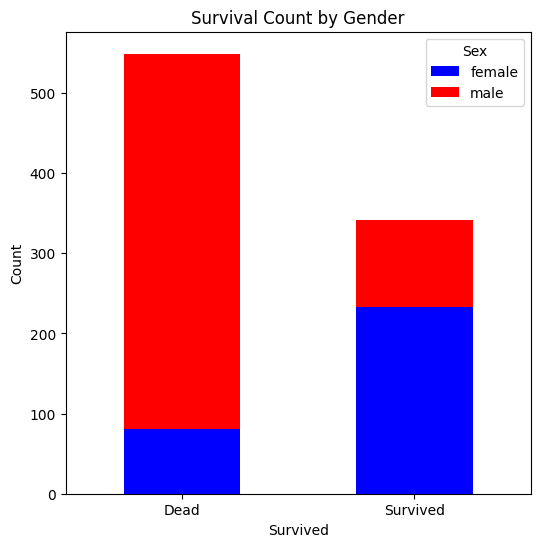

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plot_data = df[['Survived', 'Sex']].copy()
plot_data['Count'] = 1

plot_data = plot_data.groupby(['Survived', 'Sex']).count().reset_index()

plot_data_pivot = plot_data.pivot(index='Survived', columns='Sex', values='Count').fillna(0)

plot_data_pivot.plot(kind='bar', stacked=True, figsize=(6,6), color=['blue', 'red'])
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Dead', 'Survived'], rotation=0)
plt.legend(title='Sex')

plt.show()


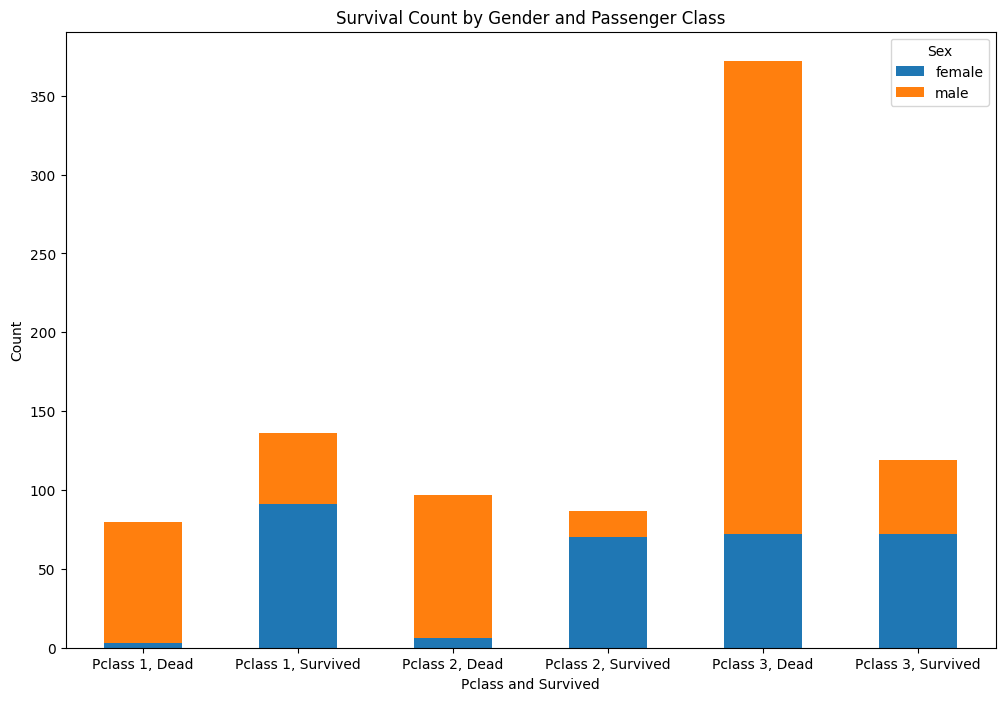

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


plot_data = df[['Survived', 'Pclass', 'Sex']].copy()
plot_data['Count'] = 1

plot_data = plot_data.groupby(['Pclass', 'Survived', 'Sex']).count().reset_index()

plot_data_pivot = plot_data.pivot(index=['Pclass', 'Survived'], columns='Sex', values='Count').fillna(0)

plot_data_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
plt.title('Survival Count by Gender and Passenger Class')
plt.xlabel('Pclass and Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')

new_labels = [f"Pclass {cls}, {'Survived' if survived == 1 else 'Dead'}" for cls, survived in plot_data_pivot.index]
plt.gca().set_xticklabels(new_labels)

plt.show()


In [7]:
df['AgeClass'] = df['Age'].apply(lambda x: 0 if x <= 16 else 1 if x <= 26 else 2 if x <= 36 else 3 if x <= 62 else 4)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,2


In [8]:
# Drop the 'Age' column
df.drop('Age', axis=1, inplace=True)

# Verify the column is dropped
df.head()


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


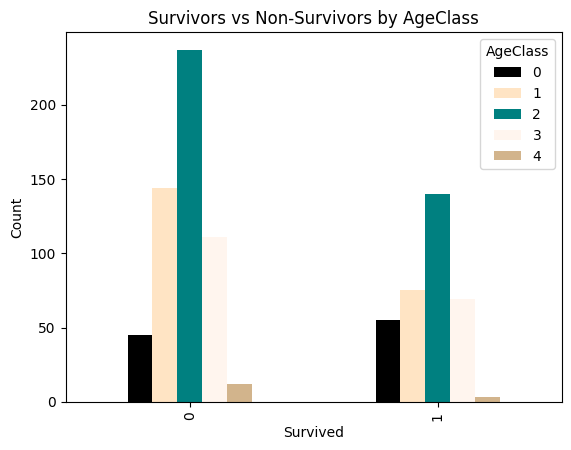

In [13]:
import matplotlib.pyplot as plt

# Group by 'Survived' and 'AgeClass' and count the occurrences
grouped_data = df.groupby(['Survived', 'AgeClass']).size().unstack()

# Define colors for the bars
colors = ['black', 'bisque', 'teal', 'seashell', 'tan']

# Create the plot
fig, ax = plt.subplots()

# Plot the bars
grouped_data.plot(kind='bar', stacked=False, color=colors[:grouped_data.shape[1]], ax=ax)

# Add title and labels
ax.set_title('Survivors vs Non-Survivors by AgeClass')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')

plt.show()


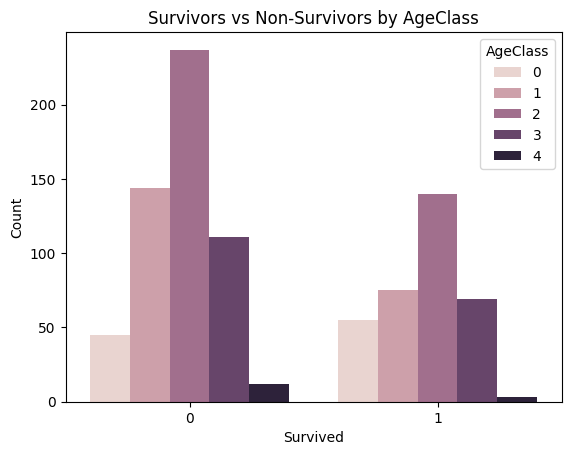

In [10]:
import seaborn as sns

sns.countplot(x='Survived', hue='AgeClass', data=df)
plt.title('Survivors vs Non-Survivors by AgeClass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
